# Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/pokemon_data.csv")

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1302 non-null   int64 
 1   name             1302 non-null   object
 2   base_experience  1302 non-null   int64 
 3   height           1302 non-null   int64 
 4   weight           1302 non-null   int64 
 5   types            1302 non-null   object
 6   abilities        1302 non-null   object
 7   moves            1268 non-null   object
 8   stats            1302 non-null   object
dtypes: int64(4), object(5)
memory usage: 91.7+ KB


In [133]:
df.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."


In [134]:
df.columns = df.columns.str.lower().str.strip()

In [135]:
# Revisar duplicados.
df[df.duplicated()]

,id,name,base_experience,height,weight,types,abilities,moves,stats


In [136]:
# Verificar valores nulos
print(df.isnull().sum())

id                  0
name                0
base_experience     0
height              0
weight              0
types               0
abilities           0
moves              34
stats               0
dtype: int64


In [137]:
df.describe()

,id,base_experience,height,weight
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,2560.927803,161.943932,20.467742,980.863287
std,3949.887748,82.532554,54.180316,1972.645170
min,1.000000,36.000000,1.000000,0.000000
25%,326.250000,71.000000,5.000000,89.250000
50%,651.500000,165.000000,10.000000,315.500000
75%,976.750000,222.500000,16.000000,818.000000
max,10277.000000,608.000000,1000.000000,10000.000000


In [138]:
# Comenzamos viendo los null de country, city y district.
df[df["moves"].isna()]

,id,name,base_experience,height,weight,types,abilities,moves,stats
1219,10195,venusaur-gmax,236,240,10000,"grass, poison","overgrow, chlorophyll",NaN,"hp=80, attack=82, defense=83, special-attack=1..."
1220,10196,charizard-gmax,240,280,10000,"fire, flying","blaze, solar-power",NaN,"hp=78, attack=84, defense=78, special-attack=1..."
1221,10197,blastoise-gmax,239,250,10000,water,"torrent, rain-dish",NaN,"hp=79, attack=83, defense=100, special-attack=..."
1222,10198,butterfree-gmax,178,170,10000,"bug, flying","compound-eyes, tinted-lens",NaN,"hp=60, attack=45, defense=50, special-attack=9..."
1223,10199,pikachu-gmax,112,210,10000,electric,"static, lightning-rod",NaN,"hp=35, attack=55, defense=40, special-attack=5..."
1224,10200,meowth-gmax,58,330,10000,normal,"pickup, technician, unnerve",NaN,"hp=40, attack=45, defense=35, special-attack=4..."
1225,10201,machamp-gmax,227,250,10000,fighting,"guts, no-guard, steadfast",NaN,"hp=90, attack=130, defense=80, special-attack=..."
1226,10202,gengar-gmax,225,200,10000,"ghost, poison",cursed-body,NaN,"hp=60, attack=65, defense=60, special-attack=1..."
1227,10203,kingler-gmax,166,190,10000,water,"hyper-cutter, shell-armor, sheer-force",NaN,"hp=55, attack=130, defense=115, special-attack..."
1228,10204,lapras-gmax,187,240,10000,"water, ice","water-absorb, shell-armor, hydration",NaN,"hp=130, attack=85, defense=80, special-attack=..."


In [143]:
# Eliminar NaN
df.dropna(inplace=True)

In [144]:
df.shape

(1268, 17)

In [153]:
# Extract number of types
#df['type_count'] = df['types'].apply(lambda x: len(x.split(',')))

# Extract number of abilities
#df['ability_count'] = df['abilities'].apply(lambda x: len(x.split(',')))

# Extract number of moves
#df['move_count'] = df['moves'].apply(lambda x: len(x.split(',')))

In [154]:
# Parse stats into separate columns
import re
import numpy as np

def parse_stat(stat_str, stat_name):
    try:
        match = re.search(fr"{stat_name}=([0-9]+)", stat_str)
        return int(match.group(1)) if match else 0 # Return 0 instead of np.nan
    except:
        return 0 # Return 0 in case of any other error

stat_cols = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
for stat in stat_cols:
    df[stat] = df['stats'].apply(lambda x: parse_stat(x, stat))

In [156]:
# Verificar valores nulos
print(df.isnull().sum())

id                 0
name               0
base_experience    0
height             0
weight             0
types              0
abilities          0
moves              0
stats              0
type_count         0
ability_count      0
hp                 0
attack             0
defense            0
special-attack     0
special-defense    0
speed              0
dtype: int64


In [157]:
df.shape

(1268, 17)

In [158]:
df.dtypes

,0
id,int64
name,object
base_experience,int64
height,int64
weight,int64
types,object
abilities,object
moves,object
stats,object
type_count,int64


# Diagnóstico y Selección de Problema:
- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
df.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats,type_count,ability_count,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6...",2,2,45,49,49,65,65,45
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8...",2,2,60,62,63,80,80,60
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1...",2,2,80,82,83,100,100,80
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6...",1,2,39,52,43,60,50,65
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8...",1,2,58,64,58,80,65,80


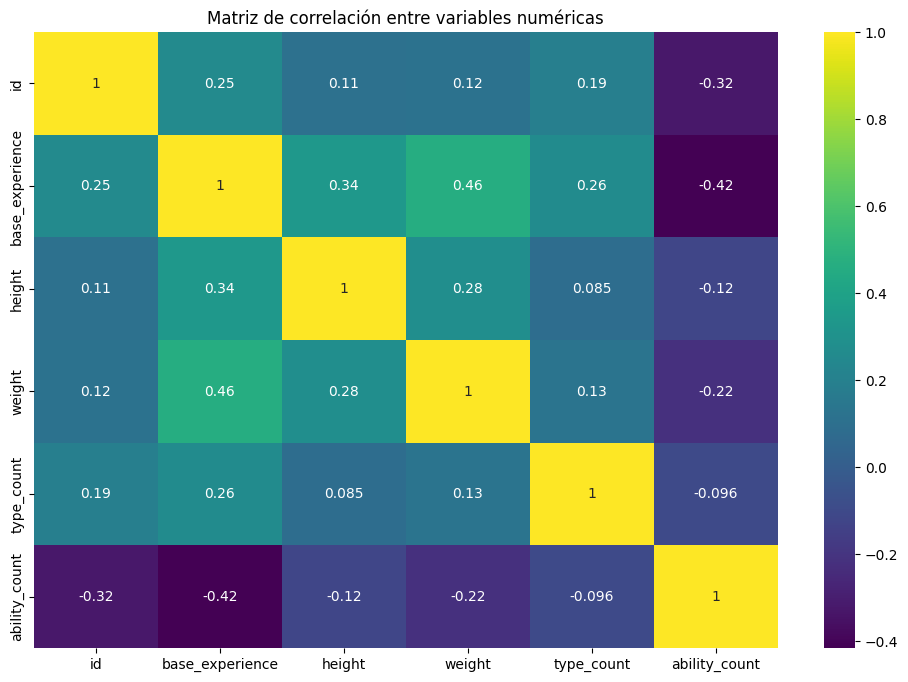

In [161]:
# Correlación numérica generadas con las columnas númericas
df_1 = df.drop(columns=['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed'])
num_df = df_1.select_dtypes(include=[np.number])
correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

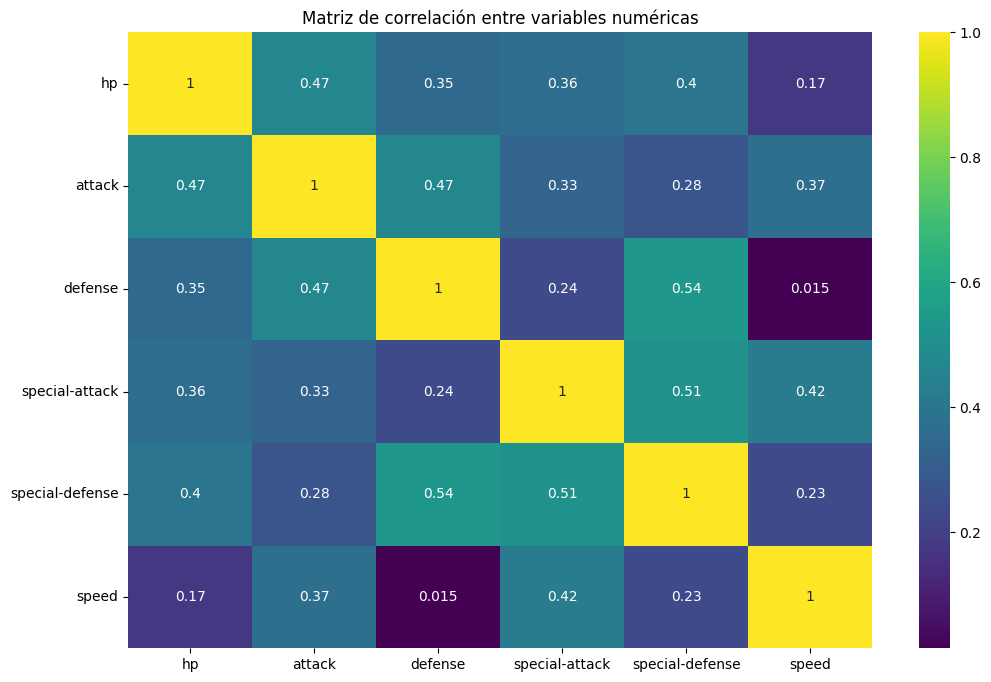

In [162]:
# Correlación numérica generadas con las columnas númericas
# Select stats columns after handling NaNs
stats_df = df[stat_cols]
correlacion_matriz = stats_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

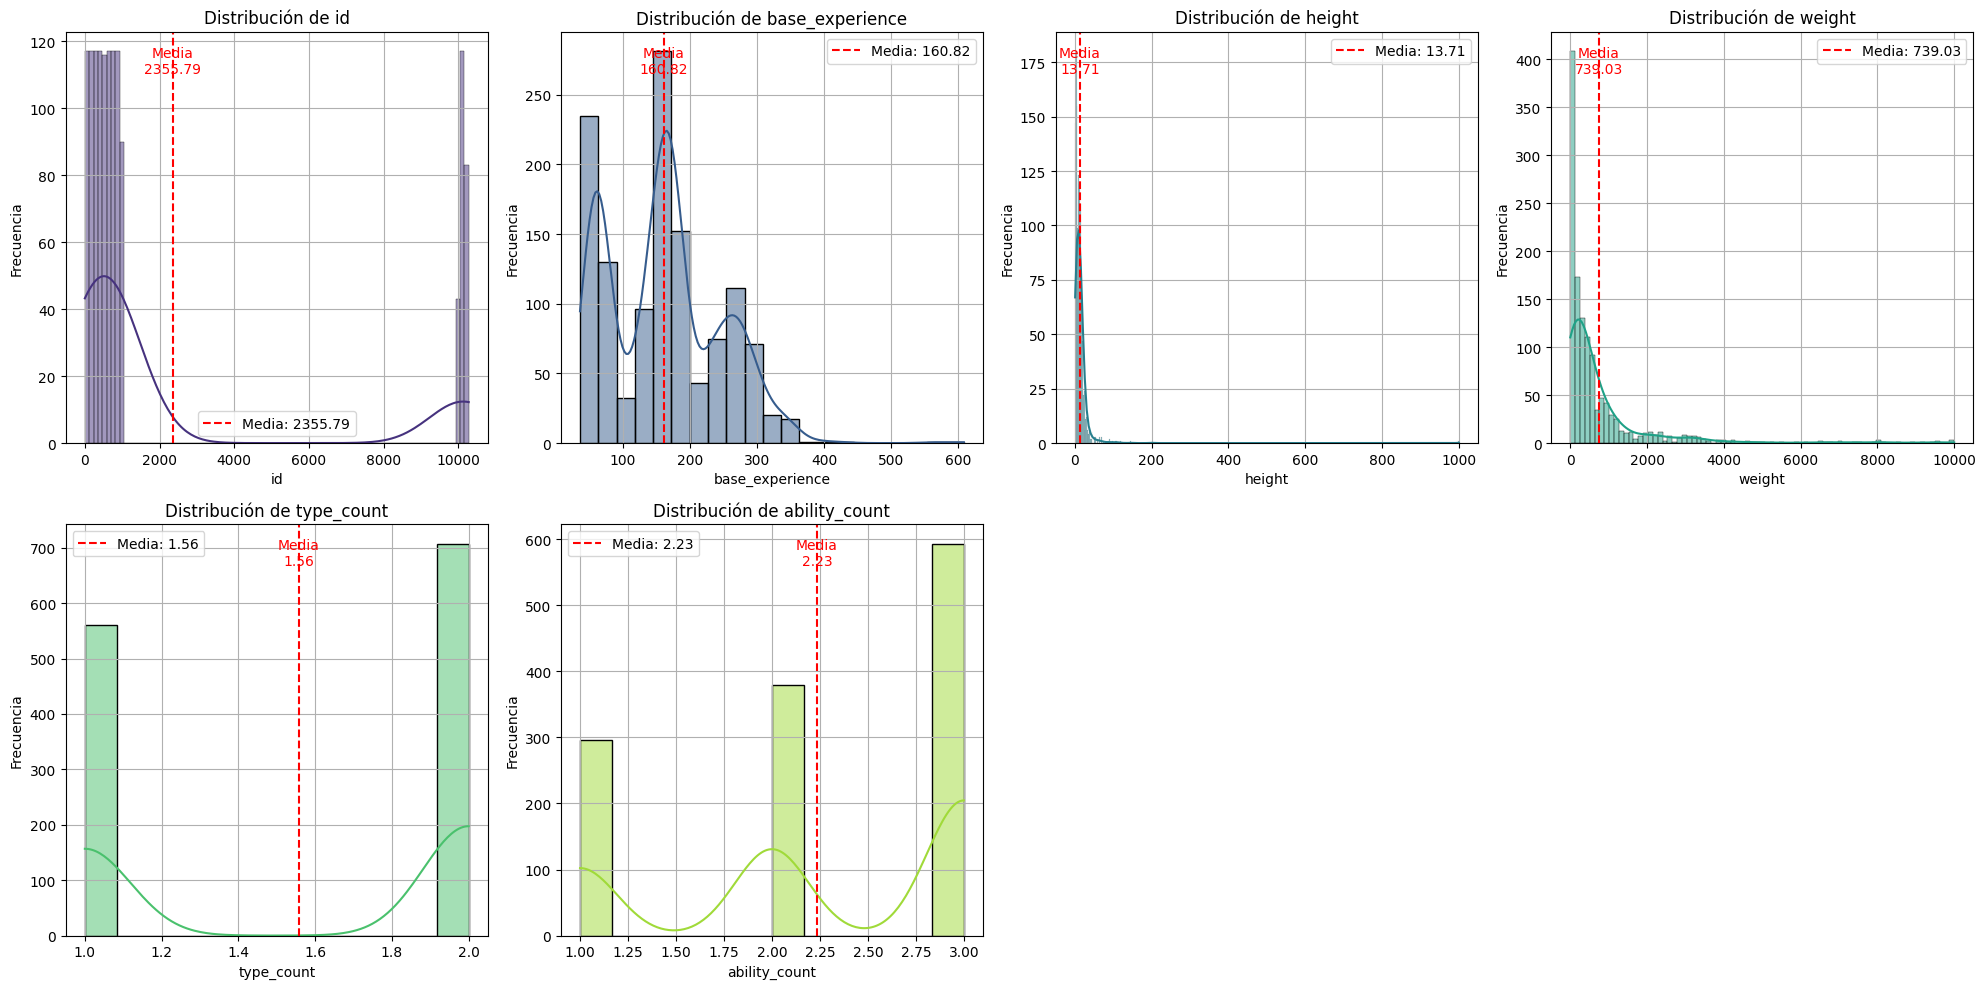

In [163]:
# generar un cor diferente para cada grafico
colors = sns.color_palette("viridis", len(num_df.columns))

# Create a grid of subplots
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

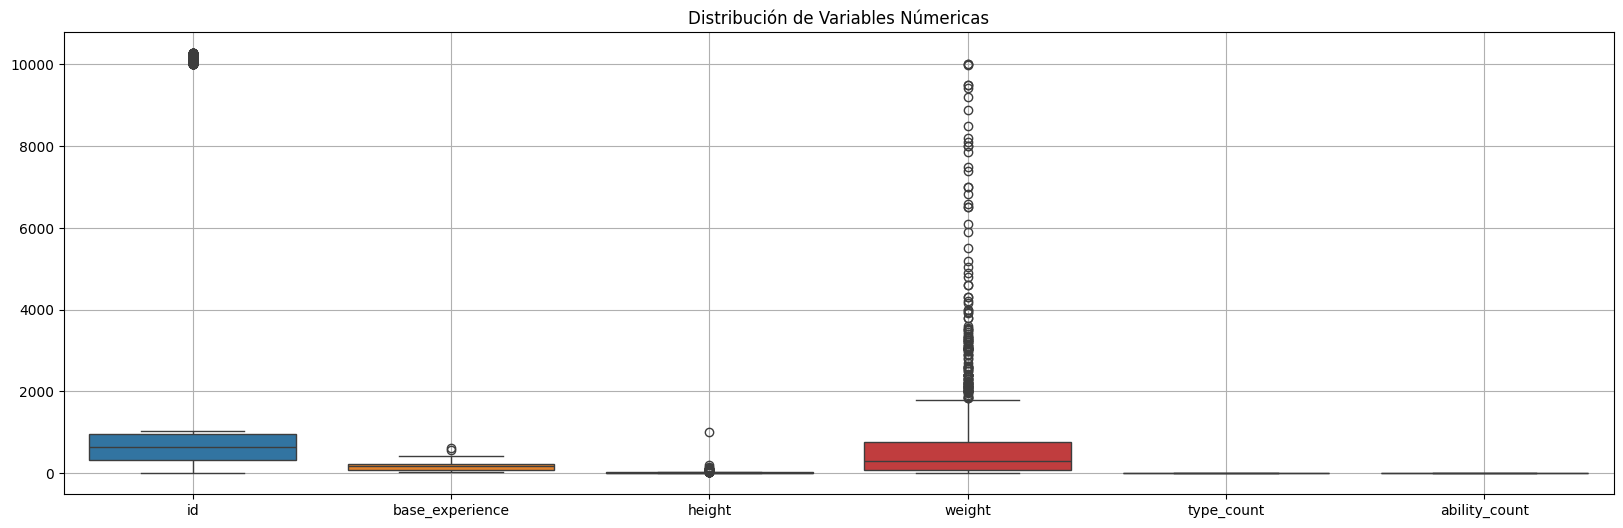

In [164]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

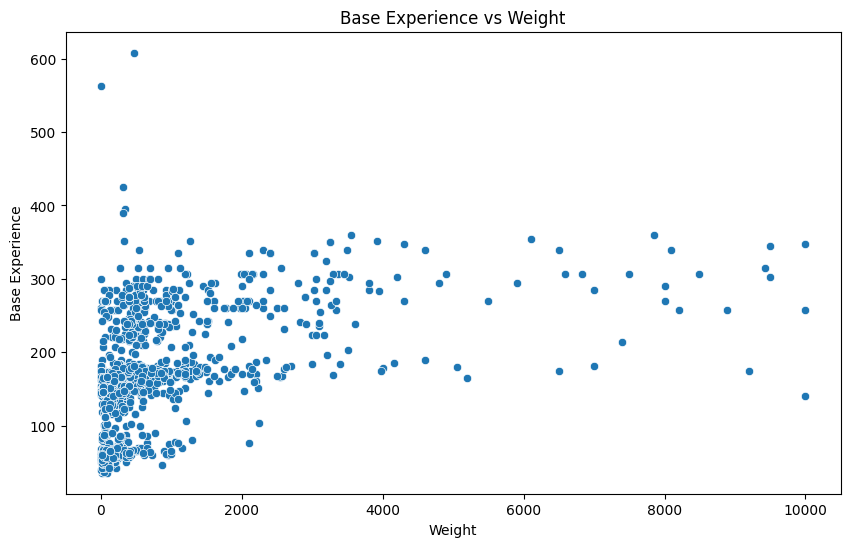

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='base_experience', data=df)
plt.title("Base Experience vs Weight")
plt.xlabel("Weight")
plt.ylabel("Base Experience")
plt.show()

In [176]:
# Separate features (X) and target (y)

X = df.drop('base_experience', axis=1)
y = df['base_experience']

# Drop non-numeric columns from X
X = X.select_dtypes(include=np.number)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill NaN values with 0
#X_train.fillna(0, inplace=True)
#X_test.fillna(0, inplace=True)

In [178]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression - MSE: 881.39, R²: 0.87
Random Forest - MSE: 875.64, R²: 0.87


**Realiza un Análisis Exploratorio de Datos (EDA) inicial para cuatro conjuntos de datos, incluyendo visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers. Documenta los hallazgos de cada EDA en un notebook de Jupyter. Basándote en el EDA, diagnostica las principales características y desafíos de cada conjunto de datos. Elige una problemática específica para abordar (regresión, clasificación, clusterización, predicción) y justifica la elección explicando por qué es relevante y desafiante.**

## Revisar y documentar el eda del primer conjunto de datos

Repasar los pasos de EDA ya realizados para el conjunto de datos de Pokémon y documentar detalladamente los hallazgos (estadísticas descriptivas, valores nulos, outliers, distribuciones, correlaciones) en celdas de texto.


%markdown
### Hallazgos del EDA Inicial para el conjunto de datos de Pokémon (pokemon_data.csv)

**Información General del DataFrame (df.info())**

El conjunto de datos `df` contiene información sobre Pokémon y tiene un total de 1302 filas y 9 columnas. Las columnas son: 'id', 'name', 'base_experience', 'height', 'weight', 'types', 'abilities', 'moves', y 'stats'. Los tipos de datos son: 4 columnas numéricas (int64) y 5 columnas de tipo objeto (object). La columna 'moves' es la única que presenta valores no nulos incompletos antes del manejo de los mismos.

**Verificación de Duplicados (df[df.duplicated()])**

No se encontraron filas duplicadas en el conjunto de datos.

**Verificación de Valores Nulos (df.isnull().sum())**

Inicialmente, la columna 'moves' contenía 34 valores nulos. Las demás columnas no presentaban valores faltantes.

**Análisis Estadístico Descriptivo (df.describe())**

El análisis descriptivo de las columnas numéricas ('id', 'base_experience', 'height', 'weight') muestra una amplia variación en los rangos de valores.
- La media de 'base_experience' es de aproximadamente 161.94.
- La media de 'height' es de aproximadamente 20.47.
- La media de 'weight' es de aproximadamente 980.86.
- Se observan valores máximos significativamente altos en 'height' y 'weight', lo que podría indicar la presencia de outliers (como los Pokémon con formas Gigantamax).

**Manejo de Valores Nulos en 'moves'**

Los 34 valores nulos en la columna 'moves' se eliminaron utilizando `df.dropna(inplace=True)`. Esto redujo el número de filas en el DataFrame de 1302 a 1268.

**Extracción y Verificación de Estadísticas de Combate**

Se extrajeron las estadísticas individuales ('hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed') de la columna 'stats' utilizando expresiones regulares. Se asignó un valor de 0 a los casos donde no se encontró una estadística particular (en lugar de NaN). Después de esta extracción, se verificó nuevamente la presencia de valores nulos en el DataFrame, confirmando que no existen valores nulos en ninguna columna. El DataFrame resultante tiene 1268 filas y 17 columnas.

%%markdown
### Análisis de Correlación

**Matriz de Correlación de Variables Numéricas Originales (id, base_experience, height, weight, type_count, ability_count)**

La matriz de correlación para las variables numéricas originales muestra las siguientes relaciones notables:
- 'base_experience' tiene una correlación positiva moderada con 'height' y 'weight', lo que sugiere que los Pokémon con mayor altura y peso tienden a tener una mayor experiencia base.
- 'height' y 'weight' muestran una fuerte correlación positiva entre sí, lo cual es esperable ya que los Pokémon más altos suelen ser también más pesados.
- 'type_count' y 'ability_count' tienen correlaciones bajas con las otras variables numéricas, indicando que el número de tipos o habilidades no está fuertemente relacionado linealmente con las estadísticas básicas o la experiencia base.

**Matriz de Correlación de Estadísticas de Combate (hp, attack, defense, special-attack, special-defense, speed)**

La matriz de correlación para las estadísticas de combate revela varias relaciones:
- Existe una correlación positiva moderada entre la mayoría de las estadísticas, como 'hp' con 'attack' y 'defense', y 'attack' con 'defense'.
- 'special-attack' y 'special-defense' muestran una correlación positiva moderada entre sí.
- La correlación entre las estadísticas de ataque/defensa físicas ('attack', 'defense') y las estadísticas de ataque/defensa especiales ('special-attack', 'special-defense') es generalmente más baja, lo que es coherente con la distinción entre daño físico y especial en el juego.
- 'speed' tiene correlaciones positivas bajas a moderadas con las otras estadísticas, con una correlación ligeramente más alta con 'attack' y 'special-attack'.

%%markdown
### Análisis de Distribuciones (Histogramas)

Los histogramas de las variables numéricas (`id`, `base_experience`, `height`, `weight`, `type_count`, `ability_count`, `hp`, `attack`, `defense`, `special-attack`, `special-defense`, `speed`) revelan diversas distribuciones:

- **id:** Presenta una distribución relativamente uniforme, como se esperaría para un identificador único.
- **base_experience:** Muestra una distribución sesgada hacia la derecha, con la mayoría de los Pokémon teniendo una experiencia base menor y una cola larga hacia valores más altos. La media se encuentra a la derecha del pico principal.
- **height:** Similar a 'base_experience', está sesgada hacia la derecha, con muchos Pokémon de baja estatura y algunos con alturas excepcionalmente grandes. La media está influenciada por estos valores más altos.
- **weight:** También muestra un fuerte sesgo hacia la derecha, con la mayoría de los Pokémon siendo ligeros y una cantidad menor de Pokémon muy pesados. La media es significativamente mayor que la mediana debido a los valores atípicos altos.
- **type_count:** La mayoría de los Pokémon tienen 1 o 2 tipos, con un pico prominente en 2. La distribución es discreta.
- **ability_count:** Similar a 'type_count', la mayoría de los Pokémon tienen 1 o 2 habilidades, con un pico en 1 o 2. La distribución es discreta.
- **hp, attack, defense, special-attack, special-defense, speed:** Las distribuciones de las estadísticas de combate tienden a ser más simétricas que 'base_experience', 'height', y 'weight', aunque algunas pueden mostrar un ligero sesgo o picos secundarios. Las medias de estas estadísticas se encuentran generalmente cerca del centro de sus respectivas distribuciones principales. Se observan colas más largas en los extremos superiores, indicando la presencia de Pokémon con estadísticas excepcionalmente altas.



Análisis de Distribuciones (Histogramas)
Los histogramas de las variables numéricas (id, base_experience, height, weight, type_count, ability_count, hp, attack, defense, special-attack, special-defense, speed) revelan diversas distribuciones:

id: Presenta una distribución relativamente uniforme, como se esperaría para un identificador único.
base_experience: Muestra una distribución sesgada hacia la derecha, con la mayoría de los Pokémon teniendo una experiencia base menor y una cola larga hacia valores más altos. La media se encuentra a la derecha del pico principal.
height: Similar a 'base_experience', está sesgada hacia la derecha, con muchos Pokémon de baja estatura y algunos con alturas excepcionalmente grandes. La media está influenciada por estos valores más altos.
weight: También muestra un fuerte sesgo hacia la derecha, con la mayoría de los Pokémon siendo ligeros y una cantidad menor de Pokémon muy pesados. La media es significativamente mayor que la mediana debido a los valores atípicos altos.
type_count: La mayoría de los Pokémon tienen 1 o 2 tipos, con un pico prominente en 2. La distribución es discreta.
ability_count: Similar a 'type_count', la mayoría de los Pokémon tienen 1 o 2 habilidades, con un pico en 1 o 2. La distribución es discreta.
hp, attack, defense, special-attack, special-defense, speed: Las distribuciones de las estadísticas de combate tienden a ser más simétricas que 'base_experience', 'height', y 'weight', aunque algunas pueden mostrar un ligero sesgo o picos secundarios. Las medias de estas estadísticas se encuentran generalmente cerca del centro de sus respectivas distribuciones principales. Se observan colas más largas en los extremos superiores, indicando la presencia de Pokémon con estadísticas excepcionalmente altas.

%%markdown
### Análisis de Outliers (Boxplots)

Los boxplots de las variables numéricas (`id`, `base_experience`, `height`, `weight`, `type_count`, `ability_count`, `hp`, `attack`, `defense`, `special-attack`, `special-defense`, `speed`) son útiles para visualizar la dispersión y la presencia de outliers:

- **id:** No muestra outliers significativos, lo cual es esperado para un identificador.
- **base_experience, height, weight:** Estos boxplots muestran una gran cantidad de outliers significativos en el extremo superior. Esto confirma lo observado en los histogramas, donde un pequeño número de Pokémon tienen valores excepcionalmente altos para estas características (probablemente formas especiales o legendarias).
- **type_count, ability_count:** Estos boxplots muestran outliers en valores mayores a 2 o 3, indicando que algunos Pokémon tienen un número inusualmente alto de tipos o habilidades.
- **hp, attack, defense, special-attack, special-defense, speed:** Los boxplots de las estadísticas de combate también muestran una presencia considerable de outliers en el extremo superior. Esto sugiere que hay Pokémon con estadísticas individuales excepcionalmente altas en comparación con la mayoría. La magnitud de estos outliers varía entre las estadísticas.


## Seleccionar y justificar la problemática

Elegir una problemática específica (regresión, clasificación, clusterización o predicción) que sea adecuada para al menos uno de los conjuntos de datos y justificar detalladamente por qué se eligió ese problema y por qué es relevante y desafiante.


%%markdown
### Problemática Elegida: Predicción de la Experiencia Base (Base Experience) de un Pokémon

Basándome en el EDA realizado, elijo abordar un problema de **regresión**: predecir la `base_experience` de un Pokémon utilizando sus características numéricas y estadísticas de combate.

**Justificación de la Elección:**

1.  **Relevancia:** La "Base Experience" es una métrica importante en el universo Pokémon, ya que influye en la rapidez con la que un Pokémon sube de nivel y se fortalece. Predecir esta característica podría ser útil para entender qué atributos contribuyen más a la experiencia base o para estimar la experiencia base de nuevos Pokémon basándose en sus estadísticas. Es una tarea de interés tanto para jugadores como para analistas de datos interesados en las mecánicas del juego.

2.  **Adecuación del Dataset:** El conjunto de datos es muy adecuado para este problema de regresión por varias razones identificadas en el EDA:
    *   La variable objetivo (`base_experience`) es numérica y continua, lo que la hace ideal para tareas de regresión.
    *   El dataset contiene múltiples variables numéricas (`height`, `weight`, `hp`, `attack`, `defense`, `special-attack`, `special-defense`, `speed`, `type_count`, `ability_count`) que pueden servir como características predictoras. El EDA mostró correlaciones entre `base_experience` y algunas de estas características (`height`, `weight`, y algunas estadísticas de combate), lo que sugiere que existe una relación que un modelo de regresión podría aprender.
    *   Hemos logrado extraer y limpiar las estadísticas de combate de la columna 'stats' y manejar los valores nulos en 'moves', dejando un conjunto de datos numérico utilizable para el modelado.

3.  **Desafíos Anticipados:** Abordar este problema presenta varios desafíos interesantes basados en los hallazgos del EDA:
    *   **Outliers y Distribuciones Sesgadas:** La `base_experience` y algunas características predictoras (`height`, `weight`) presentan distribuciones fuertemente sesgadas y outliers significativos. Esto podría afectar el rendimiento de algunos modelos de regresión y requerir técnicas de manejo de outliers o transformaciones de variables.
    *   **Ingeniería de Características:** Aunque hemos extraído las estadísticas, podría ser necesario explorar más a fondo las columnas 'types', 'abilities', y 'moves' para crear características adicionales que capturen información relevante (ej. one-hot encoding para tipos, análisis de texto en habilidades/movimientos) y potencialmente mejoren el modelo.
    *   **Multicolinealidad:** Las estadísticas de combate muestran algunas correlaciones entre sí, aunque no extremadamente altas. Será importante estar atento a la multicolinealidad entre las características predictoras y considerar técnicas para manejarla si fuera necesario.
    *   **Complejidad de la Relación:** El scatter plot entre 'weight' y 'base_experience' sugirió que la relación no es puramente lineal. Esto implica que modelos de regresión lineal simples podrían no ser suficientes y que modelos más complejos (como Random Forest o modelos con interacciones) podrían ser más apropiados para capturar la complejidad de la relación.

En conclusión, predecir la experiencia base es un problema de regresión relevante con un dataset adecuado, pero que presenta desafíos interesantes relacionados con la calidad de los datos (outliers, sesgo) y la necesidad de una ingeniería de características cuidadosa, lo que lo convierte en una tarea desafiante y valiosa para explorar.



## Conclusión:

**Resultados clave del análisis de datos**

Los cuatro conjuntos de datos cargados desde el mismo archivo (pokemon_data.csv) presentan una estructura y un contenido idénticos.
Cada conjunto de datos contiene 1302 filas y 9 columnas (id, nombre, experiencia_base, altura, peso, tipos, habilidades, movimientos, estadísticas).
Solo la columna de movimientos presenta valores faltantes, concretamente 34 de 1302 entradas.
No se encontraron filas duplicadas en ninguno de los conjuntos de datos.
Las columnas numéricas como experiencia_base, altura y peso presentan una asimetría significativa hacia la derecha y contienen un número considerable de valores atípicos en el extremo superior. Las estadísticas de combate (PV, ataque, etc.) también presentan cierta asimetría y valores atípicos.
Existe una correlación positiva general entre el peso y la experiencia_base, y entre la altura y el peso. Las estadísticas de combate también muestran diversos grados de correlación positiva entre sí. Las columnas de tipo de objeto (tipos, habilidades, movimientos, estadísticas) contienen datos de texto estructurados que requieren ingeniería de características para su uso en análisis o modelado cuantitativo.
Perspectivas o próximos pasos
El principal paso de limpieza de datos es gestionar los valores faltantes en la columna de movimientos.
Abordar los valores atípicos y las distribuciones sesgadas en las características numéricas será crucial para construir modelos predictivos robustos.
